<a href="https://colab.research.google.com/github/taljacob2/images_deep_learning/blob/master/TalYacobPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Notebook

#### Change This VM to run on GPU
For better results in the deep learning training section,
Go to this notebooks menu:

*Runtime -> Change runtime type -> Set Hardware Accelerator to "GPU".*

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

## Important: Install `fastai`
Install `fastai`. Afterwards, you may need to restart the kernel.

In [ ]:
 pip install fastai==1.0.61

Note: you may need to restart the kernel to use updated packages.


 Restart the kernel, after installing `fastai` from the step above.

### Import libraries

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from pathlib import Path

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [ ]:
# bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

# Create Dataset


## Download from [Google Images](https://images.google.com/)

Say you want to identify between the 3 *categories* of *monkey* images:
- Chimpanzee
- Urang Utan
- Baboon

1. Go to [Google Images](https://images.google.com/)
1. **For each** of these *monkey* *categories*:
   1. Search for it.
   1. Download all the images that presented in the page to a `.csv` file, that its first column presents each image's url. To do so:
      > NOTE: In case you have an *ad-blocker* extension on your browser, you might need to *disable* it to download the images.

      1. Press `F12`, to open the *Inspect* view in the browser.
      1. Write in console the below *javascript* code, run it, and rename the downloaded `.csv` file as the *category* you have searched for.
          ```javascript

          /**
           * Gets the image-urls from the given `csvElement`, and outputs
           * to a `.csv` file, with titles as its first row.
           * 
           * @param {HTMLCollectionOf<Element>} csvElement The element of
           *                                    the `.csv` within this
           *                                    window's `document`.
           * @returns A `.csv` file extracted from the given `csvElement`,
           *          that contains the image-urls of every image in it
           *          as its first column.
           * @see extractDataFromCsvElementToCsvFileWithoutTitles
           * @author Edited By Tal Jacob: 04-FEB-2022.
           */
          function createCsvFileWithTitles(csvElement){
              const csvFileWithoutTitles =
                  extractDataFromCsvElementToCsvFileWithoutTitles(csvElement);

              const END_OF_ROW_INDICATOR = '\n';

              // Defining `firstRow`.
              // const firstRow = 'imgUrl, ID' + END_OF_ROW_INDICATOR; // Disabled.
              const firstRow = '';

              // Defining `secondRowTillLastRow`.
              let secondRowTillLastRow = '';
              csvFileWithoutTitles.forEach(function (row) {
                  secondRowTillLastRow += Array.from(row).join(',');
                  secondRowTillLastRow += END_OF_ROW_INDICATOR;
              });

              const outputCsvFile = firstRow + secondRowTillLastRow;
              return outputCsvFile;
          }

          /**
           * Gets the image-urls from the given `csvElement`, and outputs
           * to a `.csv` file.
           *
           * @param {HTMLCollectionOf<Element>} csvElement The element of
           *                                    the `.csv` within this
           *                                    window's `document`.
           * @returns {[string, number][]} A `.csv` file that contains all
           *          the image-urls in its first column.
           * @author Edited by Tal Jacob: 04-FEB-2022.
           */
          function extractDataFromCsvElementToCsvFileWithoutTitles(csvElement){
              let csvFileWithoutTitles = [];

              let imageNumber = 0;    
              Array.from(csvElement).forEach((subElement) => {
                  const link = subElement.children[0].children[0].children[0].src;
                  if (!link.startsWith('http')){
                      return; // Skip the links that don't lead to a real url.
                  }
                  csvFileWithoutTitles.push([link, imageNumber++]);
              });

              return csvFileWithoutTitles;
          }

          /**
           * Downloads a `.csv` file that contains all the image-urls in its
           * first column.
           * 
           * @param {*} outputCsvFileName Set here the output `.csv` file-name.
           * @author Edited by Tal Jacob: 04-FEB-2022.
           */
          function downloadCsv(outputCsvFileName, csvFileWithTitles){
              var hiddenElement = document.createElement('a');
              hiddenElement.href = 'data:text/csv;charset=utf-8,' +
                                  encodeURI(csvFileWithTitles);
              hiddenElement.target = '_blank';
              hiddenElement.download = outputCsvFileName;
              hiddenElement.click();
          };

          //-----------------------------------------------------------------------------

          // Name you `.csv` file here.
          const FILE_NAME = 'YOUR_FILE_NAME' + '.csv';

          // Extract the `.csv` element.
          const csvElement = 
              document.getElementsByClassName('isv-r PNCib MSM1fd BUooTd');

          // Download the `.csv` of image-urls with titles.
          downloadCsv(FILE_NAME, createCsvFileWithTitles(csvElement));

          ```


## Create folders in this VM
- Create a parent folder with the name of the *dataset*.
  - For each different *text* that was searched: create a sub-folder to match the its image results.

In [ ]:
dataset_name = 'monkeys'
search_text_list = ['chimpanzee', 'urang utan', 'baboon']
path_to_dataset = Path(f'data/{dataset_name}')

for search_text in search_text_list:
  path_to_dataset_search_text = path_to_dataset/search_text
  path_to_dataset_search_text.mkdir(parents=True, exist_ok=True)

If you want, you may view all the folders created, with this command:

In [ ]:
path_to_dataset.ls()

[PosixPath('data/monkeys/urang utan'),
 PosixPath('data/monkeys/chimpanzee'),
 PosixPath('data/monkeys/baboon')]

## Upload the .csv datasets to the newly created folders in this VM

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://raw.githubusercontent.com/fastai/course-v3/master/nbs/dl1/images/download_images/upload.png)

> ### NOTE:
> To delete a folder that have files in it, you should run:
> ```python
> import shutil
> shutil.rmtree(path_to_directory_or_file_to_delete)
> ```
> For exmaple:
> ```python
> import shutil
> shutil.rmtree(path_to_dataset/'chimpanzee'/'downloaded_images')
> ```
> For example, **delete the whole dataset**:
> ```python
> import shutil
> shutil.rmtree(path_to_dataset)
> ```


## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [ ]:
downloaded_images_of = 'dio'

for search_text in search_text_list:
    print(f'Downloading the images of: {search_text}')
    path_to_dataset_search_text = path_to_dataset/search_text
    path_to_dio_search_text = path_to_dataset_search_text/f'{downloaded_images_of} {search_text}/'
    download_images(path_to_dataset_search_text/f'{search_text}.csv',
                    path_to_dio_search_text, max_pics=200)
    
    # Remove any images that can't be opened:
    verify_images(path_to_dataset_search_text, delete=True, max_size=500)

## Normalize the images, and refer it as `data` from now on

Now we normalize all the images we took to be at a constant size.
A common useful size is `224`.

> My recommendation for this dataset is to start training the neural network with image size 300 and progressively increase it to 400 and finish it with size 500. By this way, the model should be able to generalize well for different image resolutions. [Taken from here](https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path_to_dataset,
                                  train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=2).normalize(imagenet_stats)

/opt/conda/lib/python3.7/site-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]


Lets view the images in the batch

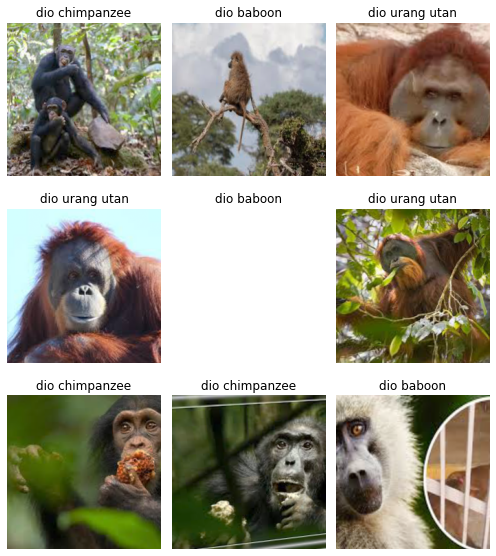

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

Or, you may view a single image if you want

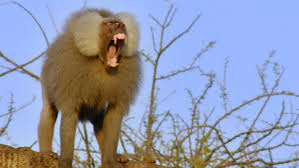

In [ ]:
img = open_image(path_to_dio_search_text/'00000000.jpg')  # Configure `img` to be this image.
img  # View the image.

# Train model

### Lets take a *cnn-learner* (Convolutional Neural Network Learner), that was already trained on other datasets, and train it to our dataset.

- Take the *cnn-learner* of `resnet34`, and initialize it to our dataset.
- Also, tell the *cnn-learner* to show the *error-rate* of its training results.

In [ ]:
cnn_learner = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

### Let's train our *cnn-learner*

> Each training cycle is called an `epoch` or a `fit`.

let's run the *cnn-learner* for 4 cycles.



In [ ]:
cnn_learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.309717,0.147206,0.025000,00:07
1,0.690132,0.110191,0.025000,00:04
2,0.454157,0.103355,0.025000,00:05
3,0.342502,0.102011,0.025000,00:07


### We may also save the stage of this `cnn_learner`'s training to a file, so that we could anytime revert to that saved staged, and restore its *"brain"*.

In [ ]:
cnn_learner.save('stage-1')

To load a stage, run:
For example:

```python
cnn_learner.load('stage-1');
```

### Freeze / Unfreeze

We may `unfreeze` the `cnn_learner` to expose the old "brain" layers of it to be rewriteable. This way we would lose the older layers given to us with the `resnet34` that were trained on other datasets, and instead we would rewrite them with our *monkeys* dataset.

In [ ]:
cnn_learner.unfreeze()

#### After the `unfreeze()`, we should train the `cnn_learner` again to reach more accuracy
> WARNING: We need to be careful not to train it too much, so we will save the current stage on each epoch.


In [ ]:
stage_name = f'stage-after-unfreeze-{-1}'
cnn_learner.save(stage_name)
print(stage_name)

for i in range(8):
    cnn_learner.fit_one_cycle(1)  # Train

    stage_name = f'stage-after-unfreeze-{i}'  # Save stage
    cnn_learner.save(stage_name)
    print(stage_name)

stage-after-unfreeze--1


epoch,train_loss,valid_loss,error_rate,time
0,0.178974,3.328423,0.441667,00:06


stage-after-unfreeze-0


epoch,train_loss,valid_loss,error_rate,time
0,0.138745,0.232281,0.041667,00:06


stage-after-unfreeze-1


epoch,train_loss,valid_loss,error_rate,time
0,0.208038,0.407751,0.075000,00:06


stage-after-unfreeze-2


epoch,train_loss,valid_loss,error_rate,time
0,0.104959,0.431863,0.058333,00:06


stage-after-unfreeze-3


epoch,train_loss,valid_loss,error_rate,time
0,0.116283,0.061034,0.016667,00:07


stage-after-unfreeze-4


epoch,train_loss,valid_loss,error_rate,time
0,0.126897,0.175456,0.033333,00:07


stage-after-unfreeze-5


epoch,train_loss,valid_loss,error_rate,time
0,0.024184,0.289256,0.033333,00:06


stage-after-unfreeze-6


epoch,train_loss,valid_loss,error_rate,time
0,0.053704,0.277115,0.033333,00:06


stage-after-unfreeze-7


Now, revert to the stage saved with the **least train_loss**

In [ ]:
# For example:
cnn_learner.load('stage-after-unfreeze-4');

### Let's plot a graph of the error-rate


First, create all the points in the graph

In [ ]:
cnn_learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Now, let's plot the graph.
> The graph should be a **decreasing function**.


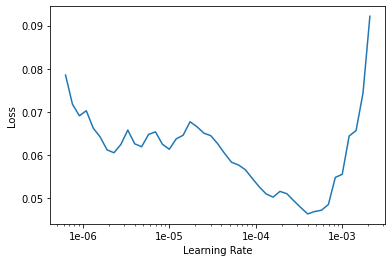

In [ ]:
# If the plot is not showing try to give a start and end learning rate
# cnn_learner.lr_find(start_lr=1e-5, end_lr=1e-1)
cnn_learner.recorder.plot()

### Explanation to the Graph

As more time we go and train *cnn-learner*, then it will more likely to succeed guessing the images' *categories*. So we will see the graph **decreasing**.
But across time, we will see that in some place, the graph changes its direction to be **increasing**, and this is the place where we had trained the *cnn-learner* too much on the same *sub-section of the dataset*, so that when it is asked to distinguish another image that was not presented in that *sub-section of the dataset*, it cannot learn how to solve it to get better - and that is why we see on that spot that the error-rate increases.
This place is called the *over-fitting* position.
> "*You cannot teach an old dog new tricks*"


#### So, we want to *cut* the best sections of our trainings, where the graph is still **decreasing**.

Let's *cut* right after the graph is **decreassing** and a bit before the graph is **increasing**.

In [ ]:
stage_name = f'stage-after-graph-{-1}'
cnn_learner.save(stage_name)
print(stage_name)

for i in range(8):
    cnn_learner.fit_one_cycle(1, max_lr=slice(2e-5, 3e-4))  # Train

    stage_name = f'stage-after-graph-{i}'  # Save stage
    cnn_learner.save(stage_name)
    print(stage_name)

stage-after-graph--1


epoch,train_loss,valid_loss,error_rate,time
0,0.039778,0.042686,0.026316,00:03


In [ ]:
cnn_learner.save('stage-2')

## Interpretation
Let's view the *error-rate* in a confusion matrix.
We will view what the *cnn_learner* predicted, and what were the actual images.


In [ ]:
interpretation = ClassificationInterpretation.from_learner(cnn_learner)

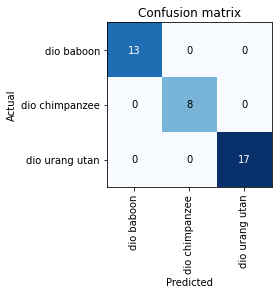

In [ ]:
interpretation.plot_confusion_matrix()

## Putting your model in production
#### In this section we will:
- Export the `cnn_learner` we have trained to a file.
- Import a `cnn_learner` from the exported file.

### Export the `cnn_learner` to a file

First thing first, let's export the content of our `cnn_learner` object for production.
This will create a file named `export.pkl` in the *monkeys* dataset folder.

In [ ]:
cnn_learner.export()

### Import a `cnn_learner` from a file

In this section, for learning purposes, we will use the above exported `export.pkl` file, to load our own `cnn_learner` to another *new* `cnn_learner` object.

Let's get the path to the `export.pkl` file's folder:
> NOTE: The default is that `export.pkl` is created in the dataset folder.

In [ ]:
path_to_export_pkl = path_to_dataset

Import the `cnn_learner` from the `export.pkl` file

In [ ]:
new_cnn_learner = load_learner(path_to_export_pkl)

## View Prediction

Let's perform a prediction to an image, and view the results of our *cnn_learner*

First, let's configure an image, as shown in the previous sections

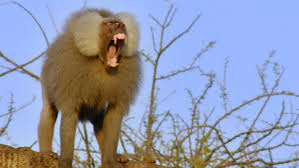

In [ ]:
img = open_image(path_to_dio_search_text/'00000000.jpg')  # Configure `img` to be this image.
img  # View the image.

Now, let's predict the image with our *cnn_learner*, and view the results.

In [ ]:
# Calculate prediction for the given image.
pred_class, pred_idx, outputs = new_cnn_learner.predict(img)

# View the prediction for the given image.
pred_class.obj

'dio baboon'